## OASIS INFOBYTE DATA SCIENCE INTERNSHIP TASK 2 - UNEMPLOYMENT ANALYSIS WITH PYTHON

# DHAIRYA SAATOLIYA

#Importing Libraries

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

# Data Import

In [171]:
emp = pd.read_csv('/content/Unemployment_Rate_upto_11_2020.csv')

In [172]:
emp.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74


In [173]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [174]:
emp.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [175]:
emp.columns =['States','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Region','longitude','latitude']

In [176]:
emp['Date'] = pd.to_datetime(emp['Date'],dayfirst=True)

In [177]:
emp['Frequency']= emp['Frequency'].astype('category')

In [178]:
emp['Month'] =  emp['Date'].dt.month



In [179]:
emp['Month_int'] = emp['Month'].apply(lambda x : int(x))

In [180]:

emp['Month_name'] =  emp['Month_int'].apply(lambda x: calendar.month_abbr[x])

In [181]:
emp['Region'] = emp['Region'].astype('category')

In [182]:
emp.drop(columns='Month',inplace=True)
emp.head(3)

,States,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,Month_int,Month_name
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


# Statistical Analysis

In [183]:
 emp_stats = emp[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate']]


round(emp_stats.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Estimated Unemployment Rate,267.0,12.24,10.80,0.50,4.84,9.65,16.76,75.85
Estimated Employed,267.0,13962105.72,13366318.36,117542.00,2838930.50,9732417.00,21878686.00,59433759.00
Estimated Labour Participation Rate,267.0,41.68,7.85,16.77,37.26,40.39,44.06,69.69


In [184]:
region_stats = emp.groupby(['Region'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean().reset_index()

region_stats = round(region_stats,2)


region_stats

,Region,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
0,East,13.92,19602366.90,40.11
1,North,15.89,13072487.92,38.70
2,Northeast,10.95,3617105.53,52.06
3,South,10.45,14040589.33,40.44
4,West,8.24,18623512.72,41.26


#Heat Map

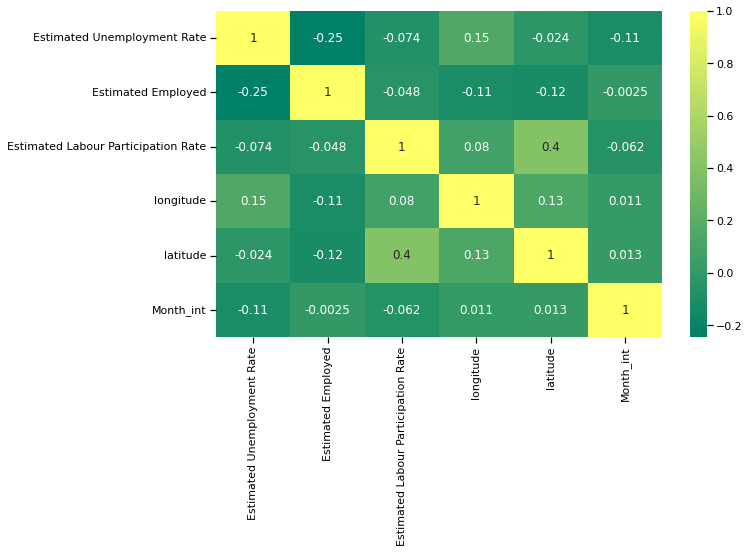

In [185]:
heat_maps = emp[['Estimated Unemployment Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate',
       'longitude', 'latitude', 'Month_int']]

heat_maps = heat_maps.corr()

plt.figure(figsize=(10,6))
sns.set_context('notebook',font_scale=1)
sns.heatmap(heat_maps, annot=True,cmap='summer');

# State Wise Analysis of the data for Unemployment

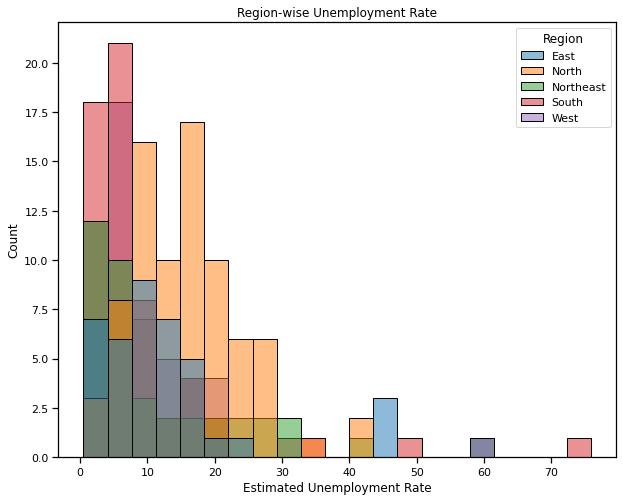

In [186]:
#unemployment rate according to different regions of India
emp.columns= ["State","Date","Frequency","Estimated Unemployment Rate","Estimated Employed","Estimated Labour Participation Rate","Region","longitude","latitude","col_10","col_11"]

plt.figure(figsize=(10, 8))
plt.title("Region-wise Unemployment Rate")
sns.histplot(x="Estimated Unemployment Rate", hue="Region", data=emp)
plt.show()

In [187]:
region = emp.groupby(["Region"])[['Estimated Unemployment Rate', "Estimated Employed", "Estimated Labour Participation Rate"]].mean()
region = pd.DataFrame(region).reset_index()

fig = px.bar(region, x="Region", y="Estimated Unemployment Rate", color="Region", title="Average Unemployment Rate by Region")
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

In [188]:
fig = px.scatter_matrix(emp,template='plotly',
dimensions=['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate'],color='Region')
fig.show()

In [189]:
unemployment = emp[["State", "Region", "Estimated Unemployment Rate"]]

fig = px.sunburst(unemployment, path=['Region','State'], values='Estimated Unemployment Rate',
                  title= 'Unemployment rate in every State and Region', height=650)
fig.show()

#--END OF CODE--

---

